In [41]:
import site
import pickle as pkl
import h5py as hp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import glob
import copy

def siteFG():
    FGPATH = '/homes/cosinga/figrid/'
    site.addsitedir(FGPATH)
    return

def loadpks(dl):
    path = '/lustre/cosinga/hcolor/output/*/results/*.pkl_rlib.pkl'
    filenames = glob.glob(path)
#     print(len(filenames))
#     print(len(set(filenames)))
#     print(filenames)
    total = 0
    for f in range(len(filenames)):
        if not "midgr" in filenames[f]:
            fl = pkl.load(open(filenames[f], 'rb'))
            newprops = {'path':filenames[f].split('/')[5].split('_')[0]}
            if 'pk' in fl.results:
                total += len(fl.results['pk'])
                dl.loadResults(fl.results['pk'], newprops)
            print("%.2f"%(f/len(filenames)*100) + r"% loaded")
    
#     print(total)
    return dl

def makeRSD(datalist):
    from figrid.data_container import DataContainer
    ip = {'space':'real'}
    real = datalist.getMatching(ip)
    rsdlist = []
    for dc in real:
        mattr = copy.deepcopy(dc.attrs)
        rmattr = []
        for k in mattr:
            if 'runtime' in k or 'space' in k:
                rmattr.append(k)
        for rm in rmattr:
            del mattr[rm]
        mattr['space'] = 'redshift'
        redshift = datalist.getMatching(mattr)
        if len(redshift) > 1:
            print('%d corresponding redshift-space for a real-space:'%len(reds))
            print("real ATTRS:")
            print(dc.attrs)
            print("redshift ATTRS:")
            for r in redshift:
                print(r.attrs)
            
        elif len(redshift) == 0:
            print('no redshift space counterparts found')
            print(dc.attrs)
            continue
        else:
            redshift = redshift[0]
            data = [dc.data[0], redshift.data[1]/dc.data[1]]
            rsd = DataContainer(data)
            mattr['space'] = 'rsd' 
            rsd.update(mattr)
            rsdlist.append(rsd)
    return rsdlist

def makeBlueRedRatio(datalist):
    from figrid.data_container import DataContainer
    ip = {'color':'blue', 'color_cut':'0.60'}
    blues = datalist.getMatching(ip)
    ratiolist = []
    for dc in blues:
        mattr = copy.deepcopy(dc.attrs)
        rmattr = []
        for k in mattr:
            if 'runtime' in k or 'color' == k:
                rmattr.append(k)
        for rm in rmattr:
            del mattr[rm]
        mattr['color'] = 'red'
        reds = datalist.getMatching(mattr)
        if len(reds) > 1:
            print('%d corresponding reds for a blue:'%len(reds))
            print("BLUE ATTRS:")
            print(dc.attrs)
            print("RED ATTRS:")
            for r in reds:
                print(r.attrs)
        if len(reds) == 0:
            print('no reds found')
            print(dc.attrs)
        else:
            reds = reds[0]
            data = [dc.data[0], reds.data[1]/dc.data[1]]
            ratio = DataContainer(data)
            mattr['color'] = 'ratio' 
            ratio.update(mattr)
            ratiolist.append(ratio)
    return ratiolist

def makeObsBias(nums, denom):
    from figrid.data_container import DataContainer
    biaslist = []
    for n in nums:
        data = [n.data[0], np.sqrt(n.data[1] / denom.data[1])]
        dc = DataContainer(data)

        dc.update(copy.deepcopy(n.attrs))
        dc.add('post_process', 'obs_bias')
        biaslist.append(dc)
    return biaslist

siteFG()
from figrid.data_sort import DataSort
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams['font.family'] = 'serif'

In [42]:
def resaveSort(name):
    ds = DataSort()
    ds = loadpks(ds)
    ds.extend(makeBlueRedRatio(ds))
    ds.extend(makeRSD(ds))
    pkl.dump(ds, open(name, 'wb'), pkl.HIGHEST_PROTOCOL)
    return
resaveSort('/lustre/cosinga/hcolor/fig_md_analysis/5-16_datasort.pkl')

0.00% loaded
0.60% loaded
1.20% loaded
1.80% loaded
2.40% loaded
2.99% loaded
3.59% loaded
4.19% loaded
4.79% loaded
5.39% loaded
5.99% loaded
6.59% loaded
7.19% loaded
7.78% loaded
8.38% loaded
8.98% loaded
9.58% loaded
20.36% loaded
20.96% loaded
21.56% loaded
22.16% loaded
22.75% loaded
23.35% loaded
23.95% loaded
24.55% loaded
25.15% loaded
25.75% loaded
26.35% loaded
26.95% loaded
27.54% loaded
28.14% loaded
28.74% loaded
29.34% loaded
29.94% loaded
30.54% loaded
31.14% loaded
31.74% loaded
32.34% loaded
32.93% loaded
33.53% loaded
34.13% loaded
34.73% loaded
35.33% loaded
35.93% loaded
36.53% loaded
37.13% loaded
37.72% loaded
38.32% loaded
38.92% loaded
39.52% loaded
40.12% loaded
40.72% loaded
41.32% loaded
41.92% loaded
42.51% loaded
43.11% loaded
43.71% loaded
44.31% loaded
44.91% loaded
45.51% loaded
46.11% loaded
46.71% loaded
47.31% loaded
47.90% loaded
48.50% loaded
49.10% loaded
49.70% loaded
50.30% loaded
50.90% loaded
51.50% loaded
52.10% loaded
52.69% loaded
53.29% lo

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'fiducial', 'result_runtime': 53.73555612564087, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'hiptl_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': 'True_False', 'is_groupcat': 'False_True', 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'real', 'compute_xi': False, 'compute_slice': 'False_True', 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'map': 'mass', 'model': 'GK11', 'HI_fieldname': 'hiptl'}
RED ATTRS:
{'path': 'fiducial', 'result_runtime': 54.13483381271362, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'hiptl_galaxy', 'is_h

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'fiducial', 'result_runtime': 54.179322719573975, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'hiptl_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': 'True_False', 'is_groupcat': 'False_True', 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'redshift', 'compute_xi': False, 'compute_slice': 'False_True', 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'map': 'mass', 'model': 'S14', 'HI_fieldname': 'hiptl'}
RED ATTRS:
{'path': 'fiducial', 'result_runtime': 54.260359048843384, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'hiptl_galaxy', 

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'fiducial', 'result_runtime': 53.760156869888306, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'hisubhalo_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'real', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'model': 'm_hi_GK11_vol', 'projection': 'vol', 'HI_res': 'diemer', 'HI_fieldname': 'hisubhalo'}
RED ATTRS:
{'path': 'fiducial', 'result_runtime': 54.378918409347534, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname':

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'fiducial', 'result_runtime': 54.50508403778076, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'hisubhalo_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'real', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'model': 'm_hi_S14_map', 'projection': 'map', 'HI_res': 'diemer', 'HI_fieldname': 'hisubhalo'}
RED ATTRS:
{'path': 'fiducial', 'result_runtime': 54.388506174087524, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': '

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'fiducial', 'result_runtime': 54.32635283470154, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'hisubhalo_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'redshift', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'model': 'm_hi_GK11_map', 'projection': 'map', 'HI_res': 'diemer', 'HI_fieldname': 'hisubhalo'}
RED ATTRS:
{'path': 'fiducial', 'result_runtime': 54.34880757331848, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'fiducial', 'result_runtime': 54.44153809547424, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'hisubhalo_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'redshift', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'model': 'm_hi_L08_map', 'projection': 'map', 'HI_res': 'diemer', 'HI_fieldname': 'hisubhalo'}
RED ATTRS:
{'path': 'fiducial', 'result_runtime': 54.34255266189575, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname'

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'fiducial', 'result_runtime': 53.85676026344299, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'galaxy_ptl', 'is_hydrogen': False, 'is_atomic': False, 'is_molecular': False, 'is_particle': 'False_True', 'is_groupcat': 'True_False', 'is_matter': True, 'mas': 'CICW', 'space': 'real', 'compute_xi': False, 'compute_slice': True, 'ptl_species': 'gas', 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60'}
RED ATTRS:
{'path': 'fiducial', 'result_runtime': 54.162699699401855, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'galaxy_ptl', 'is_hydrogen': False, 'is_atomic': False, 'is_molecular': False, 'is_part

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'fiducial', 'result_runtime': 54.32038140296936, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'galaxy_ptl', 'is_hydrogen': False, 'is_atomic': False, 'is_molecular': False, 'is_particle': 'False_True', 'is_groupcat': 'True_False', 'is_matter': True, 'mas': 'CICW', 'space': 'redshift', 'compute_xi': False, 'compute_slice': True, 'ptl_species': 'stmass', 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60'}
RED ATTRS:
{'path': 'fiducial', 'result_runtime': 54.343998432159424, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'galaxy_ptl', 'is_hydrogen': False, 'is_atomic': False, 'is_molecular': False, '

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'censat', 'result_runtime': 44.41473865509033, 'is_auto': True, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'galaxy', 'is_hydrogen': False, 'is_atomic': False, 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': True, 'mas': 'CICW', 'space': 'redshift', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'censat': 'both'}
RED ATTRS:
{'path': 'censat', 'result_runtime': 44.37088108062744, 'is_auto': True, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'galaxy', 'is_hydrogen': False, 'is_atomic': False, 'is_molecular': False, 'is_particle': False, 'is_groupcat': T

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'censat', 'result_runtime': 54.27408695220947, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'vn_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': 'True_False', 'is_groupcat': 'False_True', 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'redshift', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'censat': 'both', 'map': 'mass', 'HI_fieldname': 'vn'}
RED ATTRS:
{'path': 'censat', 'result_runtime': 54.335177183151245, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'vn_galaxy', 'is_hydrogen': 'True

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'censat', 'result_runtime': 56.455355405807495, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'hiptl_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': 'True_False', 'is_groupcat': 'False_True', 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'real', 'compute_xi': False, 'compute_slice': 'False_True', 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'censat': 'both', 'map': 'mass', 'model': 'S14', 'HI_fieldname': 'hiptl'}
RED ATTRS:
{'path': 'censat', 'result_runtime': 57.07440972328186, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'hiptl_

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'censat', 'result_runtime': 57.12115979194641, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'hiptl_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': 'True_False', 'is_groupcat': 'False_True', 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'real', 'compute_xi': False, 'compute_slice': 'False_True', 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'censat': 'centrals', 'map': 'mass', 'model': 'S14', 'HI_fieldname': 'hiptl'}
RED ATTRS:
{'path': 'censat', 'result_runtime': 56.02382040023804, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'hip

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'censat', 'result_runtime': 57.044065713882446, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'hiptl_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': 'True_False', 'is_groupcat': 'False_True', 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'real', 'compute_xi': False, 'compute_slice': 'False_True', 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'censat': 'satellites', 'map': 'mass', 'model': 'S14', 'HI_fieldname': 'hiptl'}
RED ATTRS:
{'path': 'censat', 'result_runtime': 57.30503439903259, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': '

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'censat', 'result_runtime': 57.046250104904175, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'hiptl_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': 'True_False', 'is_groupcat': 'False_True', 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'redshift', 'compute_xi': False, 'compute_slice': 'False_True', 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'censat': 'both', 'map': 'mass', 'model': 'S14', 'HI_fieldname': 'hiptl'}
RED ATTRS:
{'path': 'censat', 'result_runtime': 58.55586552619934, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'hi

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'censat', 'result_runtime': 56.591630935668945, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'hiptl_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': 'True_False', 'is_groupcat': 'False_True', 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'redshift', 'compute_xi': False, 'compute_slice': 'False_True', 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'censat': 'centrals', 'map': 'mass', 'model': 'S14', 'HI_fieldname': 'hiptl'}
RED ATTRS:
{'path': 'censat', 'result_runtime': 58.838385820388794, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname'

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'censat', 'result_runtime': 60.36312198638916, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'hiptl_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': 'True_False', 'is_groupcat': 'False_True', 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'redshift', 'compute_xi': False, 'compute_slice': 'False_True', 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'censat': 'satellites', 'map': 'mass', 'model': 'S14', 'HI_fieldname': 'hiptl'}
RED ATTRS:
{'path': 'censat', 'result_runtime': 57.636696577072144, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'censat', 'result_runtime': 54.24155640602112, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'hisubhalo_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'real', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'censat': 'both', 'model': 'm_hi_GD14_vol', 'projection': 'vol', 'HI_res': 'diemer', 'HI_fieldname': 'hisubhalo'}
RED ATTRS:
{'path': 'censat', 'result_runtime': 54.443597078323364, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0,

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'censat', 'result_runtime': 53.98262143135071, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'hisubhalo_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'real', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'censat': 'centrals_both', 'model': 'm_hi_GK11_map', 'projection': 'map', 'HI_res': 'diemer', 'HI_fieldname': 'hisubhalo'}
RED ATTRS:
{'path': 'censat', 'result_runtime': 54.29948449134827, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'a

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'censat', 'result_runtime': 54.116326332092285, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'hisubhalo_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'real', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'censat': 'satellites_both', 'model': 'm_hi_GK11_vol', 'projection': 'vol', 'HI_res': 'diemer', 'HI_fieldname': 'hisubhalo'}
RED ATTRS:
{'path': 'censat', 'result_runtime': 54.21553015708923, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16,

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'censat', 'result_runtime': 54.065852880477905, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'hisubhalo_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'real', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'censat': 'both', 'model': 'm_hi_K13_vol', 'projection': 'vol', 'HI_res': 'diemer', 'HI_fieldname': 'hisubhalo'}
RED ATTRS:
{'path': 'censat', 'result_runtime': 54.17714238166809, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'censat', 'result_runtime': 53.9454665184021, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'hisubhalo_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'real', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'censat': 'centrals_both', 'model': 'm_hi_L08_map', 'projection': 'map', 'HI_res': 'diemer', 'HI_fieldname': 'hisubhalo'}
RED ATTRS:
{'path': 'censat', 'result_runtime': 54.233908891677856, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'ax

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'censat', 'result_runtime': 53.80772042274475, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'hisubhalo_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'real', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'censat': 'satellites_both', 'model': 'm_hi_S14_map', 'projection': 'map', 'HI_res': 'diemer', 'HI_fieldname': 'hisubhalo'}
RED ATTRS:
{'path': 'censat', 'result_runtime': 54.267109632492065, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'censat', 'result_runtime': 53.89163613319397, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'hisubhalo_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'real', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'censat': 'both_centrals', 'model': 'm_hi_GD14_map', 'projection': 'map', 'HI_res': 'diemer', 'HI_fieldname': 'hisubhalo'}
RED ATTRS:
{'path': 'censat', 'result_runtime': 54.78535342216492, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'a

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'censat', 'result_runtime': 53.54057693481445, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'hisubhalo_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'real', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'censat': 'centrals', 'model': 'm_hi_GD14_vol', 'projection': 'vol', 'HI_res': 'diemer', 'HI_fieldname': 'hisubhalo'}
RED ATTRS:
{'path': 'censat', 'result_runtime': 54.49964475631714, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis':

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'censat', 'result_runtime': 53.690104484558105, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'hisubhalo_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'real', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'censat': 'satellites_centrals', 'model': 'm_hi_GK11_map', 'projection': 'map', 'HI_res': 'diemer', 'HI_fieldname': 'hisubhalo'}
RED ATTRS:
{'path': 'censat', 'result_runtime': 54.400153160095215, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'censat', 'result_runtime': 53.902886629104614, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'hisubhalo_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'real', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'censat': 'both_centrals', 'model': 'm_hi_K13_map', 'projection': 'map', 'HI_res': 'diemer', 'HI_fieldname': 'hisubhalo'}
RED ATTRS:
{'path': 'censat', 'result_runtime': 54.87293267250061, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'a

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'censat', 'result_runtime': 54.00672459602356, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'hisubhalo_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'real', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'censat': 'centrals', 'model': 'm_hi_K13_vol', 'projection': 'vol', 'HI_res': 'diemer', 'HI_fieldname': 'hisubhalo'}
RED ATTRS:
{'path': 'censat', 'result_runtime': 54.448448181152344, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis':

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'censat', 'result_runtime': 54.03074359893799, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'hisubhalo_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'real', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'censat': 'satellites_centrals', 'model': 'm_hi_L08_map', 'projection': 'map', 'HI_res': 'diemer', 'HI_fieldname': 'hisubhalo'}
RED ATTRS:
{'path': 'censat', 'result_runtime': 54.47038722038269, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-1

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'censat', 'result_runtime': 54.40479850769043, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'hisubhalo_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'real', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'censat': 'both_centrals', 'model': 'm_hi_S14_vol', 'projection': 'vol', 'HI_res': 'diemer', 'HI_fieldname': 'hisubhalo'}
RED ATTRS:
{'path': 'censat', 'result_runtime': 54.52546501159668, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'ax

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'censat', 'result_runtime': 54.41859459877014, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'hisubhalo_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'real', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'censat': 'centrals_satellites', 'model': 'm_hi_GD14_map', 'projection': 'map', 'HI_res': 'diemer', 'HI_fieldname': 'hisubhalo'}
RED ATTRS:
{'path': 'censat', 'result_runtime': 54.51977801322937, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'censat', 'result_runtime': 54.27251744270325, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'hisubhalo_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'real', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'censat': 'satellites', 'model': 'm_hi_GD14_vol', 'projection': 'vol', 'HI_res': 'diemer', 'HI_fieldname': 'hisubhalo'}
RED ATTRS:
{'path': 'censat', 'result_runtime': 54.57644200325012, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'censat', 'result_runtime': 54.36387348175049, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'hisubhalo_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'real', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'censat': 'both_satellites', 'model': 'm_hi_GK11_vol', 'projection': 'vol', 'HI_res': 'diemer', 'HI_fieldname': 'hisubhalo'}
RED ATTRS:
{'path': 'censat', 'result_runtime': 54.881773233413696, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16,

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'censat', 'result_runtime': 54.506571531295776, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'hisubhalo_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'real', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'censat': 'centrals_satellites', 'model': 'm_hi_K13_map', 'projection': 'map', 'HI_res': 'diemer', 'HI_fieldname': 'hisubhalo'}
RED ATTRS:
{'path': 'censat', 'result_runtime': 54.53078532218933, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'censat', 'result_runtime': 54.487284898757935, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'hisubhalo_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'real', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'censat': 'satellites', 'model': 'm_hi_K13_vol', 'projection': 'vol', 'HI_res': 'diemer', 'HI_fieldname': 'hisubhalo'}
RED ATTRS:
{'path': 'censat', 'result_runtime': 54.307888984680176, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axi

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'censat', 'result_runtime': 54.48022961616516, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'hisubhalo_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'real', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'censat': 'both_satellites', 'model': 'm_hi_S14_map', 'projection': 'map', 'HI_res': 'diemer', 'HI_fieldname': 'hisubhalo'}
RED ATTRS:
{'path': 'censat', 'result_runtime': 54.16735100746155, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, '

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'censat', 'result_runtime': 54.2507483959198, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'hisubhalo_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'real', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'censat': 'centrals_satellites', 'model': 'm_hi_S14_vol', 'projection': 'vol', 'HI_res': 'diemer', 'HI_fieldname': 'hisubhalo'}
RED ATTRS:
{'path': 'censat', 'result_runtime': 54.54512333869934, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'censat', 'result_runtime': 54.38614892959595, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'hisubhalo_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'redshift', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'censat': 'satellites_both', 'model': 'm_hi_GD14_map', 'projection': 'map', 'HI_res': 'diemer', 'HI_fieldname': 'hisubhalo'}
RED ATTRS:
{'path': 'censat', 'result_runtime': 54.485034227371216, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'censat', 'result_runtime': 54.360445976257324, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'hisubhalo_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'redshift', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'censat': 'both', 'model': 'm_hi_GK11_map', 'projection': 'map', 'HI_res': 'diemer', 'HI_fieldname': 'hisubhalo'}
RED ATTRS:
{'path': 'censat', 'result_runtime': 54.38045382499695, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis'

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'censat', 'result_runtime': 54.41352033615112, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'hisubhalo_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'redshift', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'censat': 'centrals_both', 'model': 'm_hi_GK11_vol', 'projection': 'vol', 'HI_res': 'diemer', 'HI_fieldname': 'hisubhalo'}
RED ATTRS:
{'path': 'censat', 'result_runtime': 54.26925563812256, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'censat', 'result_runtime': 54.344653606414795, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'hisubhalo_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'redshift', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'censat': 'satellites_both', 'model': 'm_hi_K13_map', 'projection': 'map', 'HI_res': 'diemer', 'HI_fieldname': 'hisubhalo'}
RED ATTRS:
{'path': 'censat', 'result_runtime': 54.639556646347046, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'censat', 'result_runtime': 54.28568196296692, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'hisubhalo_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'redshift', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'censat': 'both', 'model': 'm_hi_L08_map', 'projection': 'map', 'HI_res': 'diemer', 'HI_fieldname': 'hisubhalo'}
RED ATTRS:
{'path': 'censat', 'result_runtime': 54.6280198097229, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'censat', 'result_runtime': 54.35257816314697, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'hisubhalo_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'redshift', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'censat': 'centrals_both', 'model': 'm_hi_S14_map', 'projection': 'map', 'HI_res': 'diemer', 'HI_fieldname': 'hisubhalo'}
RED ATTRS:
{'path': 'censat', 'result_runtime': 54.39004993438721, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16,

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'censat', 'result_runtime': 54.43243765830994, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'hisubhalo_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'redshift', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'censat': 'satellites_both', 'model': 'm_hi_S14_vol', 'projection': 'vol', 'HI_res': 'diemer', 'HI_fieldname': 'hisubhalo'}
RED ATTRS:
{'path': 'censat', 'result_runtime': 54.58459997177124, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-1

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'censat', 'result_runtime': 54.454018354415894, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'hisubhalo_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'redshift', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'censat': 'both_centrals', 'model': 'm_hi_GD14_vol', 'projection': 'vol', 'HI_res': 'diemer', 'HI_fieldname': 'hisubhalo'}
RED ATTRS:
{'path': 'censat', 'result_runtime': 54.5838840007782, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'censat', 'result_runtime': 54.40486717224121, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'hisubhalo_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'redshift', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'censat': 'centrals', 'model': 'm_hi_GK11_map', 'projection': 'map', 'HI_res': 'diemer', 'HI_fieldname': 'hisubhalo'}
RED ATTRS:
{'path': 'censat', 'result_runtime': 54.64923548698425, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'ax

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'censat', 'result_runtime': 54.363951683044434, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'hisubhalo_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'redshift', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'censat': 'satellites_centrals', 'model': 'm_hi_GK11_vol', 'projection': 'vol', 'HI_res': 'diemer', 'HI_fieldname': 'hisubhalo'}
RED ATTRS:
{'path': 'censat', 'result_runtime': 54.58455157279968, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'censat', 'result_runtime': 54.41214442253113, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'hisubhalo_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'redshift', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'censat': 'both_centrals', 'model': 'm_hi_K13_vol', 'projection': 'vol', 'HI_res': 'diemer', 'HI_fieldname': 'hisubhalo'}
RED ATTRS:
{'path': 'censat', 'result_runtime': 54.71714925765991, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16,

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'censat', 'result_runtime': 54.388047218322754, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'hisubhalo_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'redshift', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'censat': 'centrals', 'model': 'm_hi_L08_map', 'projection': 'map', 'HI_res': 'diemer', 'HI_fieldname': 'hisubhalo'}
RED ATTRS:
{'path': 'censat', 'result_runtime': 54.68954634666443, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'ax

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'censat', 'result_runtime': 54.449214220047, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'hisubhalo_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'redshift', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'censat': 'satellites_centrals', 'model': 'm_hi_S14_map', 'projection': 'map', 'HI_res': 'diemer', 'HI_fieldname': 'hisubhalo'}
RED ATTRS:
{'path': 'censat', 'result_runtime': 54.646196603775024, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'censat', 'result_runtime': 54.05839991569519, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'hisubhalo_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'redshift', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'censat': 'both_satellites', 'model': 'm_hi_GD14_map', 'projection': 'map', 'HI_res': 'diemer', 'HI_fieldname': 'hisubhalo'}
RED ATTRS:
{'path': 'censat', 'result_runtime': 56.3785674571991, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-1

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'censat', 'result_runtime': 54.48880076408386, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'hisubhalo_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'redshift', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'censat': 'centrals_satellites', 'model': 'm_hi_GD14_vol', 'projection': 'vol', 'HI_res': 'diemer', 'HI_fieldname': 'hisubhalo'}
RED ATTRS:
{'path': 'censat', 'result_runtime': 54.67435574531555, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.2204460492503

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'censat', 'result_runtime': 54.33655571937561, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'hisubhalo_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'redshift', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'censat': 'satellites', 'model': 'm_hi_GK11_map', 'projection': 'map', 'HI_res': 'diemer', 'HI_fieldname': 'hisubhalo'}
RED ATTRS:
{'path': 'censat', 'result_runtime': 54.51198387145996, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, '

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'censat', 'result_runtime': 54.402544260025024, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'hisubhalo_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'redshift', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'censat': 'both_satellites', 'model': 'm_hi_K13_map', 'projection': 'map', 'HI_res': 'diemer', 'HI_fieldname': 'hisubhalo'}
RED ATTRS:
{'path': 'censat', 'result_runtime': 54.672810792922974, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'censat', 'result_runtime': 54.529292583465576, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'hisubhalo_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'redshift', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'censat': 'centrals_satellites', 'model': 'm_hi_K13_vol', 'projection': 'vol', 'HI_res': 'diemer', 'HI_fieldname': 'hisubhalo'}
RED ATTRS:
{'path': 'censat', 'result_runtime': 54.5506808757782, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.22044604925031

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'censat', 'result_runtime': 54.37300944328308, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'hisubhalo_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'redshift', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'censat': 'satellites', 'model': 'm_hi_L08_map', 'projection': 'map', 'HI_res': 'diemer', 'HI_fieldname': 'hisubhalo'}
RED ATTRS:
{'path': 'censat', 'result_runtime': 54.613991022109985, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, '

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'censat', 'result_runtime': 54.409825563430786, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'hisubhalo_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'redshift', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'censat': 'both_satellites', 'model': 'm_hi_S14_vol', 'projection': 'vol', 'HI_res': 'diemer', 'HI_fieldname': 'hisubhalo'}
RED ATTRS:
{'path': 'censat', 'result_runtime': 54.61660695075989, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'censat', 'result_runtime': 54.931215047836304, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'galaxy_ptl', 'is_hydrogen': False, 'is_atomic': False, 'is_molecular': False, 'is_particle': 'False_True', 'is_groupcat': 'True_False', 'is_matter': True, 'mas': 'CICW', 'space': 'real', 'compute_xi': False, 'compute_slice': True, 'ptl_species': 'dm', 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'censat': 'centrals'}
RED ATTRS:
{'path': 'censat', 'result_runtime': 54.80586552619934, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'galaxy_ptl', 'is_hydrogen': False, 'is_atomic': False, 'is_molecular'

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'censat', 'result_runtime': 62.35860824584961, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'galaxy_ptl', 'is_hydrogen': False, 'is_atomic': False, 'is_molecular': False, 'is_particle': 'False_True', 'is_groupcat': 'True_False', 'is_matter': True, 'mas': 'CICW', 'space': 'real', 'compute_xi': False, 'compute_slice': True, 'ptl_species': 'ptl', 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'censat': 'centrals'}
RED ATTRS:
{'path': 'censat', 'result_runtime': 62.39065670967102, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'galaxy_ptl', 'is_hydrogen': False, 'is_atomic': False, 'is_molecular'

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'censat', 'result_runtime': 62.65720319747925, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'galaxy_ptl', 'is_hydrogen': False, 'is_atomic': False, 'is_molecular': False, 'is_particle': 'False_True', 'is_groupcat': 'True_False', 'is_matter': True, 'mas': 'CICW', 'space': 'redshift', 'compute_xi': False, 'compute_slice': True, 'ptl_species': 'dm', 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'censat': 'centrals'}
RED ATTRS:
{'path': 'censat', 'result_runtime': 63.14313197135925, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'galaxy_ptl', 'is_hydrogen': False, 'is_atomic': False, 'is_molecul

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'censat', 'result_runtime': 60.90171670913696, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'galaxy_ptl', 'is_hydrogen': False, 'is_atomic': False, 'is_molecular': False, 'is_particle': 'False_True', 'is_groupcat': 'True_False', 'is_matter': True, 'mas': 'CICW', 'space': 'redshift', 'compute_xi': False, 'compute_slice': True, 'ptl_species': 'ptl', 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'censat': 'centrals'}
RED ATTRS:
{'path': 'censat', 'result_runtime': 60.874037742614746, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'galaxy_ptl', 'is_hydrogen': False, 'is_atomic': False, 'is_molec

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'fiducial', 'result_runtime': 53.976524114608765, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 67, 'redshift': 0.5030475232448832, 'axis': 0, 'fieldname': 'hisubhalo_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'real', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'model': 'm_hi_GD14_vol', 'projection': 'vol', 'HI_res': 'diemer', 'HI_fieldname': 'hisubhalo'}
RED ATTRS:
{'path': 'fiducial', 'result_runtime': 54.22255301475525, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 67, 'redshift': 0.5030475232448832, 'axis': 0, 'fieldname': 'hisub

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'fiducial', 'result_runtime': 53.914942264556885, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 67, 'redshift': 0.5030475232448832, 'axis': 0, 'fieldname': 'hisubhalo_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'real', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'model': 'm_hi_K13_vol', 'projection': 'vol', 'HI_res': 'diemer', 'HI_fieldname': 'hisubhalo'}
RED ATTRS:
{'path': 'fiducial', 'result_runtime': 54.15111804008484, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 67, 'redshift': 0.5030475232448832, 'axis': 0, 'fieldname': 'hisubh

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'fiducial', 'result_runtime': 54.143465518951416, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 67, 'redshift': 0.5030475232448832, 'axis': 0, 'fieldname': 'hisubhalo_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'redshift', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'model': 'm_hi_GD14_map', 'projection': 'map', 'HI_res': 'diemer', 'HI_fieldname': 'hisubhalo'}
RED ATTRS:
{'path': 'fiducial', 'result_runtime': 54.3473744392395, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 67, 'redshift': 0.5030475232448832, 'axis': 0, 'fieldname': 'hi

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'fiducial', 'result_runtime': 54.18345355987549, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 67, 'redshift': 0.5030475232448832, 'axis': 0, 'fieldname': 'hisubhalo_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'redshift', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'model': 'm_hi_K13_map', 'projection': 'map', 'HI_res': 'diemer', 'HI_fieldname': 'hisubhalo'}
RED ATTRS:
{'path': 'fiducial', 'result_runtime': 54.42719078063965, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 67, 'redshift': 0.5030475232448832, 'axis': 0, 'fieldname': 'his

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'fiducial', 'result_runtime': 54.25334620475769, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 67, 'redshift': 0.5030475232448832, 'axis': 0, 'fieldname': 'hisubhalo_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'redshift', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'model': 'm_hi_S14_vol', 'projection': 'vol', 'HI_res': 'diemer', 'HI_fieldname': 'hisubhalo'}
RED ATTRS:
{'path': 'fiducial', 'result_runtime': 54.47720956802368, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 67, 'redshift': 0.5030475232448832, 'axis': 0, 'fieldname': 'his

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'fiducial', 'result_runtime': 54.00960183143616, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 67, 'redshift': 0.5030475232448832, 'axis': 0, 'fieldname': 'galaxy_ptl', 'is_hydrogen': False, 'is_atomic': False, 'is_molecular': False, 'is_particle': 'False_True', 'is_groupcat': 'True_False', 'is_matter': True, 'mas': 'CICW', 'space': 'real', 'compute_xi': False, 'compute_slice': True, 'ptl_species': 'gas', 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60'}
RED ATTRS:
{'path': 'fiducial', 'result_runtime': 53.86281728744507, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 67, 'redshift': 0.5030475232448832, 'axis': 0, 'fieldname': 'galaxy_ptl', 'is_hydrogen': False, 'is_atomic': False, 'is_molecular': False, 'is_particle': 

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'fiducial', 'result_runtime': 53.93970799446106, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 67, 'redshift': 0.5030475232448832, 'axis': 0, 'fieldname': 'galaxy_ptl', 'is_hydrogen': False, 'is_atomic': False, 'is_molecular': False, 'is_particle': 'False_True', 'is_groupcat': 'True_False', 'is_matter': True, 'mas': 'CICW', 'space': 'redshift', 'compute_xi': False, 'compute_slice': True, 'ptl_species': 'stmass', 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60'}
RED ATTRS:
{'path': 'fiducial', 'result_runtime': 54.11711764335632, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 67, 'redshift': 0.5030475232448832, 'axis': 0, 'fieldname': 'galaxy_ptl', 'is_hydrogen': False, 'is_atomic': False, 'is_molecular': False, 'is_part

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'fiducial', 'result_runtime': 54.26356863975525, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 67, 'redshift': 0.5030475232448832, 'axis': 0, 'fieldname': 'hiptl_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': 'True_False', 'is_groupcat': 'False_True', 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'redshift', 'compute_xi': False, 'compute_slice': 'False_True', 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'map': 'mass', 'model': 'GK11', 'HI_fieldname': 'hiptl'}
RED ATTRS:
{'path': 'fiducial', 'result_runtime': 54.18392062187195, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 67, 'redshift': 0.5030475232448832, 'axis': 0, 'fieldname': 'hiptl_galaxy', 'is_hyd

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'axis', 'result_runtime': 53.8015022277832, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 2, 'fieldname': 'hisubhalo_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'real', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'model': 'm_hi_GD14_vol', 'projection': 'vol', 'HI_res': 'diemer', 'HI_fieldname': 'hisubhalo'}
RED ATTRS:
{'path': 'axis', 'result_runtime': 54.04613924026489, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 2, 'fieldname': 'hisubhalo

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'axis', 'result_runtime': 54.01550793647766, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 2, 'fieldname': 'hisubhalo_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'real', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'model': 'm_hi_K13_vol', 'projection': 'vol', 'HI_res': 'diemer', 'HI_fieldname': 'hisubhalo'}
RED ATTRS:
{'path': 'axis', 'result_runtime': 54.04529690742493, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 2, 'fieldname': 'hisubhalo

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'axis', 'result_runtime': 54.081082820892334, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 2, 'fieldname': 'hisubhalo_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'redshift', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'model': 'm_hi_GD14_map', 'projection': 'map', 'HI_res': 'diemer', 'HI_fieldname': 'hisubhalo'}
RED ATTRS:
{'path': 'axis', 'result_runtime': 54.12722396850586, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 2, 'fieldname': 'his

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'axis', 'result_runtime': 54.21186065673828, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 2, 'fieldname': 'hisubhalo_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'redshift', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'model': 'm_hi_K13_map', 'projection': 'map', 'HI_res': 'diemer', 'HI_fieldname': 'hisubhalo'}
RED ATTRS:
{'path': 'axis', 'result_runtime': 54.095396280288696, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 2, 'fieldname': 'hisu

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'axis', 'result_runtime': 54.30530285835266, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 2, 'fieldname': 'hisubhalo_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'redshift', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'model': 'm_hi_S14_vol', 'projection': 'vol', 'HI_res': 'diemer', 'HI_fieldname': 'hisubhalo'}
RED ATTRS:
{'path': 'axis', 'result_runtime': 54.264166831970215, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 2, 'fieldname': 'hisu

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'axis', 'result_runtime': 54.3033127784729, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 2, 'fieldname': 'hiptl_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': 'True_False', 'is_groupcat': 'False_True', 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'redshift', 'compute_xi': False, 'compute_slice': 'False_True', 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'map': 'mass', 'model': 'GK11', 'HI_fieldname': 'hiptl'}
RED ATTRS:
{'path': 'axis', 'result_runtime': 54.17785930633545, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 2, 'fieldname': 'hiptl_galaxy', 'is_hydrog

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'axis', 'result_runtime': 67.20298838615417, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 2, 'fieldname': 'vn_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': 'True_False', 'is_groupcat': 'False_True', 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'redshift', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'map': 'mass', 'HI_fieldname': 'vn'}
RED ATTRS:
{'path': 'axis', 'result_runtime': 64.92133045196533, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 2, 'fieldname': 'vn_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': '

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'axis', 'result_runtime': 54.257344245910645, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 2, 'fieldname': 'galaxy_ptl', 'is_hydrogen': False, 'is_atomic': False, 'is_molecular': False, 'is_particle': 'False_True', 'is_groupcat': 'True_False', 'is_matter': True, 'mas': 'CICW', 'space': 'redshift', 'compute_xi': False, 'compute_slice': True, 'ptl_species': 'gas', 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60'}
RED ATTRS:
{'path': 'axis', 'result_runtime': 54.224883794784546, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 2, 'fieldname': 'galaxy_ptl', 'is_hydrogen': False, 'is_atomic': False, 'is_molecular': False, 'is_particl

22 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'MAS', 'result_runtime': 44.68130278587341, 'is_auto': True, 'box': 74.99999999999999, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'galaxy', 'is_hydrogen': False, 'is_atomic': False, 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': True, 'mas': 'rCICW', 'space': 'real', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60'}
RED ATTRS:
{'path': 'MAS', 'result_runtime': 44.72884798049927, 'is_auto': True, 'box': 74.99999999999999, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'galaxy', 'is_hydrogen': False, 'is_atomic': False, 'is_molecular': False, 'is_particle': False, 'is_groupcat': True,

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'MAS', 'result_runtime': 58.23880457878113, 'is_auto': True, 'box': 74.99999999999999, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'galaxy', 'is_hydrogen': False, 'is_atomic': False, 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': True, 'mas': 'CIC', 'space': 'real', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'hisubhalo_result_runtime': 58.23880457878113, 'hisubhalo_is_auto': True, 'hisubhalo_box': 74.99999999999999, 'hisubhalo_simname': 'tng100', 'hisubhalo_sim_resolution': 'high', 'hisubhalo_num_part': 1733600704, 'hisubhalo_grid_resolution': 800, 'hisubhalo_snapshot': 99, 'hisubhalo_redshift': 2.220446049250313e-16, 'hisubhalo_axis': 0, 'hisubhalo_fieldname': 'hisubhalo', 'hisubhalo_is_hydrogen':

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'MAS', 'result_runtime': 59.319889307022095, 'is_auto': True, 'box': 74.99999999999999, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'galaxy', 'is_hydrogen': False, 'is_atomic': False, 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': True, 'mas': 'CIC', 'space': 'real', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'hisubhalo_result_runtime': 59.319889307022095, 'hisubhalo_is_auto': True, 'hisubhalo_box': 74.99999999999999, 'hisubhalo_simname': 'tng100', 'hisubhalo_sim_resolution': 'high', 'hisubhalo_num_part': 1733600704, 'hisubhalo_grid_resolution': 800, 'hisubhalo_snapshot': 99, 'hisubhalo_redshift': 2.220446049250313e-16, 'hisubhalo_axis': 0, 'hisubhalo_fieldname': 'hisubhalo', 'hisubhalo_is_hydrogen

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'MAS', 'result_runtime': 58.34769678115845, 'is_auto': True, 'box': 74.99999999999999, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'galaxy', 'is_hydrogen': False, 'is_atomic': False, 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': True, 'mas': 'CIC', 'space': 'real', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'hisubhalo_result_runtime': 58.34769678115845, 'hisubhalo_is_auto': True, 'hisubhalo_box': 74.99999999999999, 'hisubhalo_simname': 'tng100', 'hisubhalo_sim_resolution': 'high', 'hisubhalo_num_part': 1733600704, 'hisubhalo_grid_resolution': 800, 'hisubhalo_snapshot': 99, 'hisubhalo_redshift': 2.220446049250313e-16, 'hisubhalo_axis': 0, 'hisubhalo_fieldname': 'hisubhalo', 'hisubhalo_is_hydrogen':

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'MAS', 'result_runtime': 59.12021613121033, 'is_auto': True, 'box': 74.99999999999999, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'galaxy', 'is_hydrogen': False, 'is_atomic': False, 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': True, 'mas': 'CIC', 'space': 'redshift', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'hisubhalo_result_runtime': 59.12021613121033, 'hisubhalo_is_auto': True, 'hisubhalo_box': 74.99999999999999, 'hisubhalo_simname': 'tng100', 'hisubhalo_sim_resolution': 'high', 'hisubhalo_num_part': 1733600704, 'hisubhalo_grid_resolution': 800, 'hisubhalo_snapshot': 99, 'hisubhalo_redshift': 2.220446049250313e-16, 'hisubhalo_axis': 0, 'hisubhalo_fieldname': 'hisubhalo', 'hisubhalo_is_hydrog

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'MAS', 'result_runtime': 58.81502556800842, 'is_auto': True, 'box': 74.99999999999999, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'galaxy', 'is_hydrogen': False, 'is_atomic': False, 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': True, 'mas': 'CIC', 'space': 'redshift', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'hisubhalo_result_runtime': 58.81502556800842, 'hisubhalo_is_auto': True, 'hisubhalo_box': 74.99999999999999, 'hisubhalo_simname': 'tng100', 'hisubhalo_sim_resolution': 'high', 'hisubhalo_num_part': 1733600704, 'hisubhalo_grid_resolution': 800, 'hisubhalo_snapshot': 99, 'hisubhalo_redshift': 2.220446049250313e-16, 'hisubhalo_axis': 0, 'hisubhalo_fieldname': 'hisubhalo', 'hisubhalo_is_hydrog

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'MAS', 'result_runtime': 58.8977587223053, 'is_auto': True, 'box': 74.99999999999999, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'galaxy', 'is_hydrogen': False, 'is_atomic': False, 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': True, 'mas': 'CIC', 'space': 'redshift', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'hisubhalo_result_runtime': 58.8977587223053, 'hisubhalo_is_auto': True, 'hisubhalo_box': 74.99999999999999, 'hisubhalo_simname': 'tng100', 'hisubhalo_sim_resolution': 'high', 'hisubhalo_num_part': 1733600704, 'hisubhalo_grid_resolution': 800, 'hisubhalo_snapshot': 99, 'hisubhalo_redshift': 2.220446049250313e-16, 'hisubhalo_axis': 0, 'hisubhalo_fieldname': 'hisubhalo', 'hisubhalo_is_hydrogen

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'MAS', 'result_runtime': 58.490132331848145, 'is_auto': True, 'box': 74.99999999999999, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'galaxy', 'is_hydrogen': False, 'is_atomic': False, 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': True, 'mas': 'rCICW', 'space': 'real', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'hisubhalo_result_runtime': 58.490132331848145, 'hisubhalo_is_auto': True, 'hisubhalo_box': 74.99999999999999, 'hisubhalo_simname': 'tng100', 'hisubhalo_sim_resolution': 'high', 'hisubhalo_num_part': 1733600704, 'hisubhalo_grid_resolution': 800, 'hisubhalo_snapshot': 99, 'hisubhalo_redshift': 2.220446049250313e-16, 'hisubhalo_axis': 0, 'hisubhalo_fieldname': 'hisubhalo', 'hisubhalo_is_hydrog

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'MAS', 'result_runtime': 58.96575951576233, 'is_auto': True, 'box': 74.99999999999999, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'galaxy', 'is_hydrogen': False, 'is_atomic': False, 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': True, 'mas': 'rCICW', 'space': 'real', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'hisubhalo_result_runtime': 58.96575951576233, 'hisubhalo_is_auto': True, 'hisubhalo_box': 74.99999999999999, 'hisubhalo_simname': 'tng100', 'hisubhalo_sim_resolution': 'high', 'hisubhalo_num_part': 1733600704, 'hisubhalo_grid_resolution': 800, 'hisubhalo_snapshot': 99, 'hisubhalo_redshift': 2.220446049250313e-16, 'hisubhalo_axis': 0, 'hisubhalo_fieldname': 'hisubhalo', 'hisubhalo_is_hydrogen

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'MAS', 'result_runtime': 58.532387256622314, 'is_auto': True, 'box': 74.99999999999999, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'galaxy', 'is_hydrogen': False, 'is_atomic': False, 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': True, 'mas': 'rCICW', 'space': 'real', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'hisubhalo_result_runtime': 58.532387256622314, 'hisubhalo_is_auto': True, 'hisubhalo_box': 74.99999999999999, 'hisubhalo_simname': 'tng100', 'hisubhalo_sim_resolution': 'high', 'hisubhalo_num_part': 1733600704, 'hisubhalo_grid_resolution': 800, 'hisubhalo_snapshot': 99, 'hisubhalo_redshift': 2.220446049250313e-16, 'hisubhalo_axis': 0, 'hisubhalo_fieldname': 'hisubhalo', 'hisubhalo_is_hydrog

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'MAS', 'result_runtime': 58.247036933898926, 'is_auto': True, 'box': 74.99999999999999, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'galaxy', 'is_hydrogen': False, 'is_atomic': False, 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': True, 'mas': 'rCICW', 'space': 'redshift', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'hisubhalo_result_runtime': 58.247036933898926, 'hisubhalo_is_auto': True, 'hisubhalo_box': 74.99999999999999, 'hisubhalo_simname': 'tng100', 'hisubhalo_sim_resolution': 'high', 'hisubhalo_num_part': 1733600704, 'hisubhalo_grid_resolution': 800, 'hisubhalo_snapshot': 99, 'hisubhalo_redshift': 2.220446049250313e-16, 'hisubhalo_axis': 0, 'hisubhalo_fieldname': 'hisubhalo', 'hisubhalo_is_hy

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'MAS', 'result_runtime': 59.07038068771362, 'is_auto': True, 'box': 74.99999999999999, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'galaxy', 'is_hydrogen': False, 'is_atomic': False, 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': True, 'mas': 'rCICW', 'space': 'redshift', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'hisubhalo_result_runtime': 59.07038068771362, 'hisubhalo_is_auto': True, 'hisubhalo_box': 74.99999999999999, 'hisubhalo_simname': 'tng100', 'hisubhalo_sim_resolution': 'high', 'hisubhalo_num_part': 1733600704, 'hisubhalo_grid_resolution': 800, 'hisubhalo_snapshot': 99, 'hisubhalo_redshift': 2.220446049250313e-16, 'hisubhalo_axis': 0, 'hisubhalo_fieldname': 'hisubhalo', 'hisubhalo_is_hydr

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'MAS', 'result_runtime': 59.16690754890442, 'is_auto': True, 'box': 74.99999999999999, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'galaxy', 'is_hydrogen': False, 'is_atomic': False, 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': True, 'mas': 'rCICW', 'space': 'redshift', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'hisubhalo_result_runtime': 59.16690754890442, 'hisubhalo_is_auto': True, 'hisubhalo_box': 74.99999999999999, 'hisubhalo_simname': 'tng100', 'hisubhalo_sim_resolution': 'high', 'hisubhalo_num_part': 1733600704, 'hisubhalo_grid_resolution': 800, 'hisubhalo_snapshot': 99, 'hisubhalo_redshift': 2.220446049250313e-16, 'hisubhalo_axis': 0, 'hisubhalo_fieldname': 'hisubhalo', 'hisubhalo_is_hydr

no reds found
{'path': 'MAS', 'result_runtime': 53.797940492630005, 'is_auto': True, 'box': 74.99999999999999, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'galaxy', 'is_hydrogen': False, 'is_atomic': False, 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': True, 'mas': 'CIC', 'space': 'real', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'galaxy_result_runtime': 53.797940492630005, 'galaxy_is_auto': True, 'galaxy_box': 74.99999999999999, 'galaxy_simname': 'tng100', 'galaxy_sim_resolution': 'high', 'galaxy_num_part': 1733600704, 'galaxy_grid_resolution': 800, 'galaxy_snapshot': 99, 'galaxy_redshift': 2.220446049250313e-16, 'galaxy_axis': 0, 'galaxy_fieldname': 'galaxy', 'galaxy_is_hydrogen': False, 'galaxy_is_atomic': False, 'galaxy_is_molecular': False, 'ga

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'axis', 'result_runtime': 73.22726607322693, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 1, 'fieldname': 'vn_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': 'True_False', 'is_groupcat': 'False_True', 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'redshift', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'map': 'mass', 'HI_fieldname': 'vn'}
RED ATTRS:
{'path': 'axis', 'result_runtime': 73.95552563667297, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 1, 'fieldname': 'vn_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': '

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'axis', 'result_runtime': 56.14773082733154, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 1, 'fieldname': 'galaxy_ptl', 'is_hydrogen': False, 'is_atomic': False, 'is_molecular': False, 'is_particle': 'False_True', 'is_groupcat': 'True_False', 'is_matter': True, 'mas': 'CICW', 'space': 'redshift', 'compute_xi': False, 'compute_slice': True, 'ptl_species': 'gas', 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60'}
RED ATTRS:
{'path': 'axis', 'result_runtime': 56.15643882751465, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 1, 'fieldname': 'galaxy_ptl', 'is_hydrogen': False, 'is_atomic': False, 'is_molecular': False, 'is_particle'

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'axis', 'result_runtime': 75.13104605674744, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 1, 'fieldname': 'hisubhalo_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'real', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'model': 'm_hi_GK11_vol', 'projection': 'vol', 'HI_res': 'diemer', 'HI_fieldname': 'hisubhalo'}
RED ATTRS:
{'path': 'axis', 'result_runtime': 74.18263125419617, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 1, 'fieldname': 'hisubhal

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'axis', 'result_runtime': 73.12291979789734, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 1, 'fieldname': 'hisubhalo_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'real', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'model': 'm_hi_S14_map', 'projection': 'map', 'HI_res': 'diemer', 'HI_fieldname': 'hisubhalo'}
RED ATTRS:
{'path': 'axis', 'result_runtime': 72.28756499290466, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 1, 'fieldname': 'hisubhalo

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'axis', 'result_runtime': 72.38297748565674, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 1, 'fieldname': 'hisubhalo_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'redshift', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'model': 'm_hi_GK11_map', 'projection': 'map', 'HI_res': 'diemer', 'HI_fieldname': 'hisubhalo'}
RED ATTRS:
{'path': 'axis', 'result_runtime': 75.25396060943604, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 1, 'fieldname': 'hisu

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'axis', 'result_runtime': 72.10859203338623, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 1, 'fieldname': 'hisubhalo_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'redshift', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'model': 'm_hi_L08_map', 'projection': 'map', 'HI_res': 'diemer', 'HI_fieldname': 'hisubhalo'}
RED ATTRS:
{'path': 'axis', 'result_runtime': 72.96796488761902, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 1, 'fieldname': 'hisub

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'axis', 'result_runtime': 56.054060220718384, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 1, 'fieldname': 'hiptl_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': 'True_False', 'is_groupcat': 'False_True', 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'real', 'compute_xi': False, 'compute_slice': 'False_True', 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'map': 'mass', 'model': 'GK11', 'HI_fieldname': 'hiptl'}
RED ATTRS:
{'path': 'axis', 'result_runtime': 56.17814922332764, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 1, 'fieldname': 'hiptl_galaxy', 'is_hydrogen

2 corresponding reds for a blue:
BLUE ATTRS:
{'path': 'axis', 'result_runtime': 56.61309480667114, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 1, 'fieldname': 'hiptl_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': 'True_False', 'is_groupcat': 'False_True', 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'redshift', 'compute_xi': False, 'compute_slice': 'False_True', 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'map': 'mass', 'model': 'S14', 'HI_fieldname': 'hiptl'}
RED ATTRS:
{'path': 'axis', 'result_runtime': 56.51293897628784, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 1, 'fieldname': 'hiptl_galaxy', 'is_hydrog

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [3]:
ds = pkl.load(open('/lustre/cosinga/hcolor/fig_md_analysis/5-16_datasort.pkl', 'rb'))

In [4]:
print(ds.getAttrs())

['path', 'result_runtime', 'is_auto', 'box', 'simname', 'sim_resolution', 'num_part', 'grid_resolution', 'snapshot', 'redshift', 'axis', 'fieldname', 'is_hydrogen', 'is_atomic', 'is_molecular', 'is_particle', 'is_groupcat', 'is_matter', 'mas', 'space', 'compute_xi', 'compute_slice', 'map', 'model', 'HI_fieldname', 'color', 'gal_species', 'gal_res', 'color_cut', 'ptl_species', 'projection', 'HI_res', 'species', 'censat', 'hisubhalo_result_runtime', 'hisubhalo_is_auto', 'hisubhalo_box', 'hisubhalo_simname', 'hisubhalo_sim_resolution', 'hisubhalo_num_part', 'hisubhalo_grid_resolution', 'hisubhalo_snapshot', 'hisubhalo_redshift', 'hisubhalo_axis', 'hisubhalo_fieldname', 'hisubhalo_is_hydrogen', 'hisubhalo_is_atomic', 'hisubhalo_is_molecular', 'hisubhalo_is_particle', 'hisubhalo_is_groupcat', 'hisubhalo_is_matter', 'hisubhalo_mas', 'hisubhalo_space', 'hisubhalo_compute_xi', 'hisubhalo_compute_slice', 'hisubhalo_model', 'hisubhalo_projection', 'hisubhalo_HI_res', 'galaxy_result_runtime', 'ga

In [5]:
ds.tickArgs({'direction':'in', 'labelsize':12})
ds.legendArgs({'frameon':False, 'loc':'upper right', 'fontsize':12}, slc = (0,0))
ds.rowLabelArgs(pos = [0.05, 0.05], txtkw = {'fontsize':14, 'ha':'left', 'va':'bottom'})
ds.colLabelArgs(pos = [0.5, 0.95], txtkw = {'fontsize':14, 'ha':'center', 'va':'top'})
ds.axisArgs({'xscale':'log', 'yscale':'log', 'xlim':[0.11866199299595938, 20]})

In [6]:
ds.setOrder('space', ['real', 'redshift', 'rsd'])
ds.displayAs('space', ['real', 'redshift', 'rsd'], ['Real Space', 'Redshift Space', 'Redshift Space\nDistortions'])
ds.displayAs('snapshot', [99, 67], ['z = 0.0', 'z = 0.5'])
ds.displayAs('color', ['red', 'blue', 'resolved'], ['Red Galaxies', 'Blue Galaxies', 'All Galaxies'])
ds.plotArgs('color', 'red', {'color':'red'})
ds.plotArgs('color', 'blue', {'color':'blue'})
ds.plotArgs('space', 'real', {'color':'green'})
ds.plotArgs('space', 'redshift', {'color':'orange'})

# HIXGALAXY z=0.0

In [7]:
ip = {'is_auto':False, 'HI_fieldname':['vn','hiptl'], 
      'axis':0, 'grid_resolution':800, 'simname': 'tng100', 
      'snapshot':99, 'color_cut':'0.60', 'gal_res':'diemer',
      'gal_species':'stmass'}
spaces = ['real', 'redshift']
colors = ['red', 'blue']
labels = [r'Red $\times$ HI'+'\nCross-Power', r'Blue $\times$ HI'+'\nCross-Power']
for space in spaces:
    for c in range(len(colors)):
        ip['space'] = space
        ip['color'] = colors[c]
        ds.makeFill(ip, {'alpha':0.65, 'label':labels[c]})

ip = {'is_auto':False, 'HI_fieldname':['vn','hiptl'], 
      'axis':0, 'grid_resolution':800, 'simname': 'tng100', 
      'snapshot':99, 'color_cut':'0.60', 'gal_res':'diemer',
      'gal_species':'stmass'}
spaces = ['real', 'redshift']
colors = ['ratio']
# labels = ['Real Space', r'Blue $\times$ HI'+'\nCross-Power']
for s in range(len(spaces)):
    for c in range(len(colors)):
        ip['space'] = spaces[s]
        ip['color'] = colors[c]
        ds.makeFill(ip, {'alpha':0.25})


In [13]:
%%capture
ip['figrid_process'] = 'fill'
ip['color'] = ['red', 'blue']
ip['space'] = spaces
ip['HI_fieldname'] = 'vn_hiptl'
fg = ds.figrid('color', 'space', '', ip)

ip['color'] = 'ratio'
ratfg = ds.figrid('space', '', '', ip)
fg = ds.combineFigrids(fg, ratfg)

In [14]:
ylims = [(1e1, 1e4), (1e-1, 1e4), (0, 2)]
panel_colors = [ds.attr_args['space']['real']['color'], ds.attr_args['space']['redshift']['color'], 'white']
yscale = ['log', 'log', 'linear']
for i in range(3):
    idx = (i, 0)
    fg.axisArgs({'facecolor':mpl.colors.to_rgba(panel_colors[i], .25), 'ylim':ylims[i], 'yscale':yscale[i], 
                'xscale':'log'}, idx)

fg.legendArgs({}, (slice(0, None, 2),0))
fg.row_labels.append("Color Ratio")

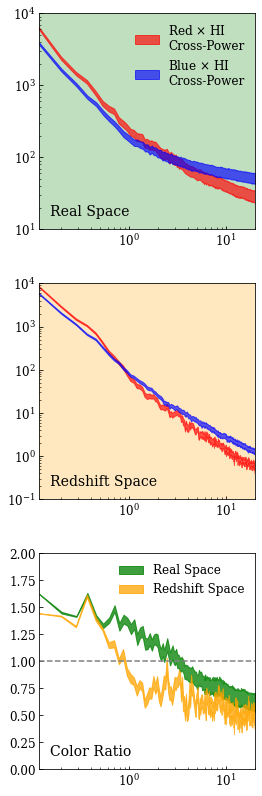

In [15]:
fg.plot()
fg.axes[2,0].plot(fg.axes[2, 0].get_xlim(), [1,1], linestyle = '--', color = 'gray')
fg.fig

# Simulation Resolution

The row values for space: ['real', 'redshift']
The column values for color: ['blue', 'red']


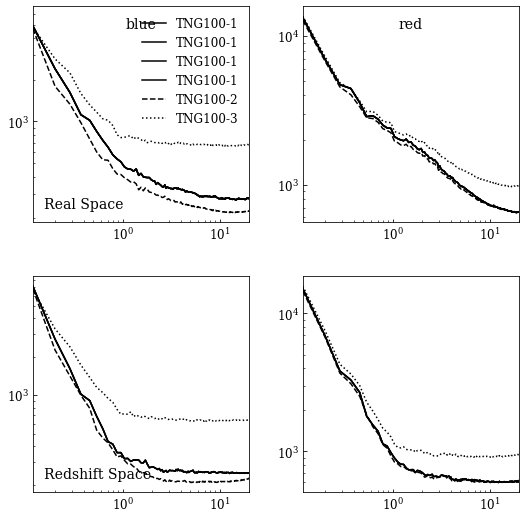

In [47]:
ip = {'is_auto':True, 'fieldname':'galaxy', 
      'axis':0, 'grid_resolution':800, 
      'snapshot':99, 'color_cut':'0.60', 'gal_res':'diemer',
      'gal_species':'stmass', 'sim_resolution':['low', 'medium', 'high'],
     'color':['blue', 'red'], 'space':['real', 'redshift'], 'mas':'CICW',
     'censat':'no key found'}
sims = ['high', 'medium', 'low']
lss = ['-', '--', ':']
labels = ['TNG100-1', 'TNG100-2', 'TNG100-3']
for s in range(len(sims)):
    
    ds.plotArgs('sim_resolution', sims[s], {'color':'black', 'linestyle':lss[s], 'label':labels[s]})

fg = ds.figrid('sim_resolution', 'space', 'color', ip)
fg.plot()

In [46]:
ds.getAttrVals('path')

['/lustre/cosinga/hcolor/output/fiducial_tng100B_099S_0A_800R/results/hiptlgrid_tng100B_099S_0A_800R.pkl_rlib.pkl',
 '/lustre/cosinga/hcolor/output/fiducial_tng100B_099S_0A_800R/results/galaxygrid_tng100B_099S_0A_800R.pkl_rlib.pkl',
 '/lustre/cosinga/hcolor/output/fiducial_tng100B_099S_0A_800R/results/ptlgrid_tng100B_099S_0A_800R.pkl_rlib.pkl',
 '/lustre/cosinga/hcolor/output/fiducial_tng100B_099S_0A_800R/results/hisubhaloXptl_tng100B_099S_0A_800R.pkl_rlib.pkl',
 '/lustre/cosinga/hcolor/output/fiducial_tng100B_099S_0A_800R/results/hisubhalogrid_tng100B_099S_0A_800R.pkl_rlib.pkl',
 '/lustre/cosinga/hcolor/output/fiducial_tng100B_099S_0A_800R/results/vnXgalaxy_tng100B_099S_0A_800R.pkl_rlib.pkl',
 '/lustre/cosinga/hcolor/output/fiducial_tng100B_099S_0A_800R/results/hiptlXgalaxy_tng100B_099S_0A_800R.pkl_rlib.pkl',
 '/lustre/cosinga/hcolor/output/fiducial_tng100B_099S_0A_800R/results/vngrid_tng100B_099S_0A_800R.pkl_rlib.pkl',
 '/lustre/cosinga/hcolor/output/fiducial_tng100B_099S_0A_800R/res

In [38]:
# for i in range(fg.dim[0]):
#     for j in range(fg.dim[1]):
#         plist = fg.panels[i, j]
#         for p in plist:
#             print()

['fiducial', 'tng100B', '099S', '0A', '800R']
['HIbt', 'tng100B', '099S', '0A', '800R']
['colordef', 'tng100B', '099S', '0A', '800R']
['species', 'tng100B', '099S', '0A', '800R']
['low-2', 'tng100-2B', '099S', '0A', '800R']
['low-3', 'tng100-3B', '099S', '0A', '800R']
['fiducial', 'tng100B', '099S', '0A', '800R']
['HIbt', 'tng100B', '099S', '0A', '800R']
['colordef', 'tng100B', '099S', '0A', '800R']
['species', 'tng100B', '099S', '0A', '800R']
['low-2', 'tng100-2B', '099S', '0A', '800R']
['low-3', 'tng100-3B', '099S', '0A', '800R']
['fiducial', 'tng100B', '099S', '0A', '800R']
['HIbt', 'tng100B', '099S', '0A', '800R']
['species', 'tng100B', '099S', '0A', '800R']
['low-2', 'tng100-2B', '099S', '0A', '800R']
['low-3', 'tng100-3B', '099S', '0A', '800R']
['fiducial', 'tng100B', '099S', '0A', '800R']
['HIbt', 'tng100B', '099S', '0A', '800R']
['species', 'tng100B', '099S', '0A', '800R']
['low-2', 'tng100-2B', '099S', '0A', '800R']
['low-3', 'tng100-3B', '099S', '0A', '800R']


In [ ]:
fg.fig